Analysis
1) The sentiment bar graph shows that CNN and New York Times are the closest to neutral on Twitter. BBC, CBS, and Fox news all display positive sentiments on their news tweets.

2) The sentiment scatter plot shows that there is decent distribution between positive and negative compound scores for CNN and and New York Times, while the other news groups seem to be weighted more positively. 

3) These two findings indicates that there is a positive bias in the news tweets for BBC, CBS, and Fox news, while CNN and New York Times have a slightly negative bias in their news tweets. CNN and New York Times are much closer to neutral sentiment when reporting news.

In [227]:
#import dependencies
import pandas as pd
import tweepy
import numpy as np
import json
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

target_users = ["BBC", "CBS", "CNN", "Fox", "nytimes"]

In [228]:
# Twitter API Keys 
consumer_key = 'IxQUpwaARQiLP17gdchT67sDg'
consumer_secret = 'c9xzitcSnLWVthnD1lqNazkinvYR8bVAjgdOOaQcDEoQgxCzWD'
access_token = '975056163627659264-ci92162xKrDuvTOgEipoih2yQbJao7i'
access_token_secret = 'HqQXo48r128E9hjTFwttPPR8264ikEQY8kblvwzq9cOJ5'

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [229]:
# Lists to hold news group dataframes
list_of_df = []


In [230]:
#Loop through each news group to build data frame
for news_group in target_users:
    
    #Create empty variables to store each news group's information
    df = {}
    comp = []
    pos = []
    neg = []
    neut = []
    tweet_array = []
    account_array = []
    date_array = []
    sentiment_array = []
    
    #API call by news group, for last 100 tweets
    public_tweets = api.user_timeline(news_group, count=100)
    for tweet in public_tweets:
        
        #Add response elements to empty variables
        tweet_array.append(tweet['text'])
        account_array.append(tweet['user']['screen_name'])
        date_array.append(tweet['created_at'])
        
        #Analyze sentiment of tweets and append scores to empty variables
        sentiment = analyzer.polarity_scores(tweet['text'])
        comp.append(sentiment['compound'])
        pos.append(sentiment['pos'])
        neg.append(sentiment['neg'])
        neut.append(sentiment['neu'])
        
    #Add dictionary column for each value    
    df['Source'] = account_array
    df['Date'] = date_array
    df['Text'] = tweet_array
    df['Comp Score'] = comp
    df['Positive Score'] = pos
    df['Negative Score'] = neg
    df['Neutral Score'] = neut
    df = pd.DataFrame(df)
    
    #Add dataframe ojbect to list of dataframes
    list_of_df.append(df)
        

In [231]:
#Rename dataframes for ["BBC", "CBS", "CNN", "Fox", "nytimes"]

bbc_df = list_of_df[0]
cbs_df = list_of_df[1]
cnn_df = list_of_df[2]
fox_df = list_of_df[3]
nytimes_df = list_of_df[4]

#Example dataframe
bbc_df.head()

,Comp Score,Date,Negative Score,Neutral Score,Positive Score,Source,Text
0,0.0000,Tue Mar 27 18:30:07 +0000 2018,0.0,1.000,0.000,BBC,When mother Marie mysteriously leaves the fami...
1,0.2942,Tue Mar 27 18:00:08 +0000 2018,0.0,0.872,0.128,BBC,"🇩🇪😂 Even if you don't speak German, this is wo..."
2,0.0000,Tue Mar 27 17:00:07 +0000 2018,0.0,1.000,0.000,BBC,🍜 We've got oodles of noodles with recipes for...
3,0.0000,Tue Mar 27 16:00:15 +0000 2018,0.0,1.000,0.000,BBC,😬 What does Facebook know about you? https://t...
4,0.6114,Tue Mar 27 15:40:40 +0000 2018,0.0,0.750,0.250,BBC,RT @BBCTwo: Happy #WorldTheatreDay! *leaves th...


In [243]:
#Generate overall sentiment score for each news group
overall_scores = []

#Loop through list of dataframes to get average Compound Score by averaging the values in 'Comp Score'
for news_overall in list_of_df:
    news_overall.to_csv(f"{(news_overall['Source'][0])}.csv")
    overall_scores.append(news_overall['Comp Score'].mean())

In [233]:
#Set style and x-axis for scatter plot
x_axis = np.arange(len(nytimes_df['Comp Score']))
sns.set_style("dark")
sns.set_context("poster")

#Check length of dataframes
print(len(x_axis))

100


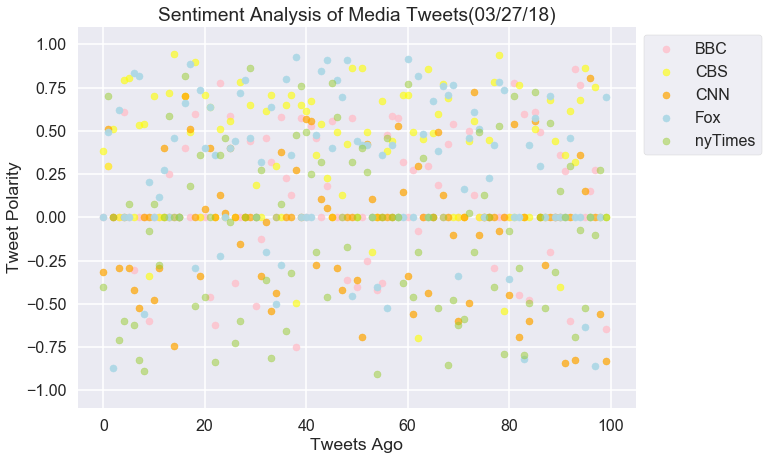

In [245]:
#Plot Scatter Plot!
plt.figure(figsize=(10,7))

plt.scatter(x_axis, bbc_df['Comp Score'], c='pink', marker='o', alpha =0.8, s=50)
plt.scatter(x_axis, cbs_df['Comp Score'], c='yellow', marker='o', alpha =0.6, s=50)
plt.scatter(x_axis, cnn_df['Comp Score'], c='orange', marker='o', alpha =0.7, s=50)
plt.scatter(x_axis, fox_df['Comp Score'], c='lightblue', marker='o', alpha =0.95, s=50)
plt.scatter(x_axis, nytimes_df['Comp Score'], c='yellowgreen', marker='o', alpha =0.5, s=50)

plt.legend(['BBC', 'CBS', 'CNN', 'Fox', "nyTimes"], loc='best', frameon=True, bbox_to_anchor=(1,1))
plt.title("Sentiment Analysis of Media Tweets(03/27/18)")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.xlim(-5, 105)
plt.ylim(-1.1,1.1)
plt.grid()
plt.savefig("Sentiment_Scatter.png")
plt.show()

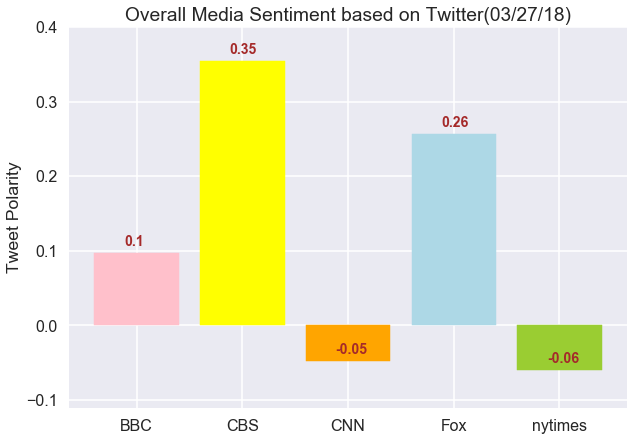

In [242]:
#plot bar plot visualizing the overall average sentiments of last 100 tweets
x_axis2 = np.arange(len(target_users))
plt.figure(figsize=(10,7))

barlist = plt.bar(x_axis2, overall_scores)
plt.title("Overall Media Sentiment based on Twitter(03/27/18)")
plt.ylabel("Tweet Polarity")
plt.ylim(-.11, 0.4)
barlist[0].set_color('pink')
barlist[1].set_color('yellow')
barlist[2].set_color('orange')
barlist[3].set_color('lightblue')
barlist[4].set_color('yellowgreen')
plt.xticks(x_axis2, target_users)
for i, v in enumerate(overall_scores):
    plt.text(i-.12,v+.01, f'{round(v, 2)}', color='brown', fontweight='bold', fontsize=14)
plt.grid()
plt.savefig("Sentiment_Bar.png")
plt.show()